In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import Quandl
import pandas as pd

In [2]:
apiKey = 'jwAAh4Ryr6PUA6DtCLvM'
hpiByState = Quandl.get('FMAC/HPI', authtoken = apiKey)

In [46]:
hpiByState.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,UT,VA,VT,WA,WI,WV,WY,United States not seasonaly adjusted,United States seasonaly adjusted
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.202566,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.536819,23.511616
1975-02-28,0.014811,0.006289,0.008483,0.017756,0.003521,0.011601,0.021606,18.329931,0.000893,0.037833,...,0.009980,0.014117,0.010111,0.009564,0.004129,0.013634,0.025374,0.015519,23.687179,23.665506
1975-03-31,0.029965,0.013635,0.015882,0.034372,0.015783,0.023031,0.037831,18.464577,0.002826,0.094757,...,0.027595,0.026753,0.017450,0.018798,0.010605,0.027140,0.051806,0.031893,23.932484,23.881498
1975-04-30,0.045762,0.022617,0.021970,0.047071,0.035817,0.033609,0.046749,18.644751,0.007380,0.165180,...,0.053070,0.036696,0.022776,0.027189,0.018412,0.039281,0.079071,0.048746,24.253337,24.148649
1975-05-31,0.062984,0.031155,0.028083,0.053354,0.052522,0.042239,0.049142,18.901160,0.015586,0.173444,...,0.060711,0.043227,0.027129,0.034549,0.025505,0.049256,0.106527,0.065019,24.458178,24.302751


In [3]:
#How To Create New Columns
hpiByState['TX2'] = hpiByState['TX'] * 2

In [4]:
hpiByState[['TX', 'TX2']].head()

<module 'matplotlib.pyplot' from '/Users/tomokilam/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

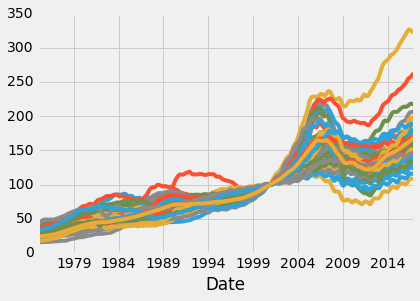

In [5]:
#How to plot a data frame
hpiByState.plot()
plt.legend().remove()
plt

In [18]:
#Seeing Percent Change of Housing Price Index
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]

In [44]:
def getPercentageChange():
    states = state_list()
    main_df = pd.DataFrame()
    apiKey = 'jwAAh4Ryr6PUA6DtCLvM'
    hpiByState = Quandl.get('FMAC/HPI', authtoken = apiKey)
    for abbv in states:
        hpiByState[abbv] = (hpiByState[abbv] - hpiByState[abbv][0]) / hpiByState[abbv][0] * 100
        
    if main_df.empty:
        main_df = hpiByState
    else:
        main_df = main_df.join(hpiByState)
    
    return main_df

In [45]:
HPI_PercentageChangeData = getPercentageChange()

<module 'matplotlib.pyplot' from '/Users/tomokilam/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

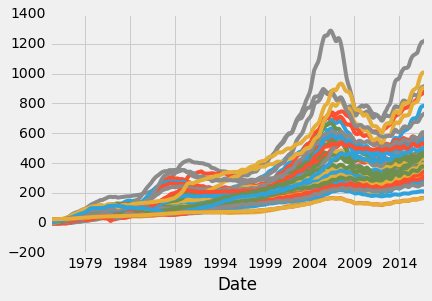

In [26]:
HPI_PercentageChangeData.plot()
plt.legend().remove()
plt

In [52]:
def HPI_Benchmark():
    df = Quandl.get("FMAC/HPI_USA", authtoken=apiKey)
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    return df

<module 'matplotlib.pyplot' from '/Users/tomokilam/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

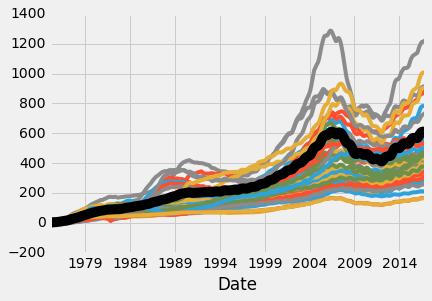

In [53]:
fig = plt.figure()
#Organizes subplot 
#Creates a 1x1 grid 
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_PercentageChangeData
benchmark = HPI_Benchmark()
HPI_PercentageChangeData.plot(ax=ax1)
#color k = black
benchmark.plot(color='k',ax=ax1, linewidth=10)

plt.legend().remove()
plt

In [54]:
#Black line shows average Housing Price Index % Change

# Correlations

In [55]:
HPI_State_Correlation = HPI_PercentageChangeData.corr()

In [56]:
#AK to AL --> shows 96% correlation --> housing prices move pretty closely to each other 
HPI_State_Correlation.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,UT,VA,VT,WA,WI,WV,WY,United States not seasonaly adjusted,United States seasonaly adjusted
AK,1.000000,0.947107,0.968356,0.912119,0.923340,0.960033,0.884038,0.967475,0.938291,0.902803,...,0.979162,0.964510,0.962720,0.956585,0.959405,0.931812,0.973056,0.987558,0.951277,0.951071
AL,0.947107,1.000000,0.995164,0.938359,0.942805,0.963719,0.952720,0.912707,0.982919,0.930279,...,0.939025,0.978968,0.975649,0.978966,0.984255,0.991313,0.982378,0.947372,0.983416,0.983258
AR,0.968356,0.995164,1.000000,0.937231,0.946291,0.975228,0.944166,0.935226,0.977975,0.928975,...,0.960422,0.982644,0.980278,0.982046,0.983522,0.986486,0.990800,0.964630,0.984369,0.984255
AZ,0.912119,0.938359,0.937231,1.000000,0.977278,0.920641,0.916472,0.897383,0.948774,0.994519,...,0.898537,0.937735,0.959059,0.925468,0.957680,0.936437,0.921098,0.911268,0.970191,0.970139
CA,0.923340,0.942805,0.946291,0.977278,1.000000,0.939810,0.940457,0.938993,0.967315,0.986143,...,0.919297,0.930199,0.979669,0.956861,0.965822,0.945505,0.937809,0.921244,0.986915,0.986800


In [57]:
#How to Describe Data Frame Data
#Gives Stats on Each Column
HPI_State_Correlation.describe()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,UT,VA,VT,WA,WI,WV,WY,United States not seasonaly adjusted,United States seasonaly adjusted
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.940959,0.968937,0.971179,0.934401,0.947964,0.954064,0.930843,0.924910,0.963526,0.931320,...,0.934989,0.957254,0.967351,0.963244,0.968469,0.964240,0.963964,0.940563,0.972543,0.972360
std,0.041335,0.027056,0.026471,0.028049,0.025016,0.029429,0.039664,0.045039,0.028710,0.031723,...,0.040208,0.031392,0.026202,0.030327,0.024038,0.027059,0.032041,0.043384,0.020824,0.020850
min,0.774530,0.874316,0.863230,0.849501,0.871490,0.840094,0.820643,0.742745,0.866281,0.836377,...,0.792776,0.850615,0.848420,0.841129,0.872337,0.883281,0.832223,0.771093,0.898243,0.897784
25%,0.931789,0.955020,0.964630,0.918866,0.937211,0.939810,0.903437,0.912725,0.949692,0.912292,...,0.916699,0.943095,0.961649,0.956568,0.959405,0.955331,0.955719,0.925361,0.967036,0.966856
50%,0.951277,0.977075,0.978481,0.936437,0.946291,0.960172,0.938656,0.935226,0.970878,0.930279,...,0.942138,0.964510,0.974607,0.970919,0.975437,0.970591,0.974152,0.950646,0.980060,0.979809
75%,0.963632,0.985516,0.986811,0.948774,0.967315,0.975009,0.960503,0.949019,0.982919,0.952001,...,0.961847,0.980939,0.979669,0.979403,0.983522,0.984585,0.985035,0.964938,0.986067,0.985799
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#Stats show that Minimum correlation for AL to another state is 0.87 which is still pretty highly correlated

# Resampling

In [59]:
#Use Resampling to increase or decrease granularity of sample data size 

In [61]:
#Resampling --> look here for options --> http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
#'H' --> hourly 
#'D' --> Daily
#'A' --> Annualy
TX1yr = HPI_PercentageChangeData['TX'].resample('A').mean()

In [63]:
TX1yr.head()

Date
1975-12-31     3.977660
1976-12-31    11.519142
1977-12-31    22.692581
1978-12-31    40.823552
1979-12-31    63.450112
Freq: A-DEC, Name: TX, dtype: float64

<module 'matplotlib.pyplot' from '/Users/tomokilam/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

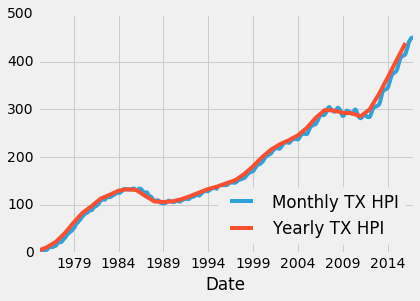

In [76]:
ax2 = plt.subplot2grid((1,1), (0,0))
HPI_PercentageChangeData['TX'].plot(ax=ax2, label='Monthly TX HPI')
TX1yr.plot(ax=ax2, label = 'Yearly TX HPI')
plt.legend(loc=4)
plt

In [77]:
#If you look at monthly TX HPI data, it shows that the troughs of the graph (the dip) are happening at Dec/Jan times
#This could indicate that people don't move as much during those times hence the lower prices

In [78]:
#How to resample to show open high low close prices for that exact period
TX1yr = HPI_PercentageChangeData['TX'].resample('A').ohlc()

In [80]:
TX1yr.head()

,open,high,low,close
Date,,,,
1975-12-31,0.000000,6.071130,0.000000,5.921635
1976-12-31,6.336414,14.336600,6.336414,14.336600
1977-12-31,14.820171,29.383546,14.820171,29.383546
1978-12-31,30.769320,49.566391,30.769320,49.566391
1979-12-31,51.010996,74.541696,51.010996,74.541696


# Handling Missing Data